# p.222 연습
대출자들의 채무 상환과 관련된 데이터를 활용하여 상환 여부를 예측하기 위한 분류 모델링을 실시하고, 각 모델별 정확도를 오분류율 기준으로 평가하시오.
* 목표변수 : BAD(범주형)
* 데이터 비율 train : test = 0.7 : 0.3
* random_state = 1234

# Step 0. 패키지 불러오기

In [1]:
# 데이터 구성
import pandas as pd
import numpy as np
# 데이터 시각화
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
# 한글, 음수 표시
matplotlib.rc('font', family = 'Malgun Gothic')
matplotlib.rc('axes', unicode_minus = False)
# 데이터 분리
from sklearn.model_selection import train_test_split
# Scaler
from sklearn.preprocessing import StandardScaler
# DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier as DTC
# RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier as RFC
# GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier as GBC
# MLPClassifier
from sklearn.neural_network import MLPClassifier
# GridSearchCV
from sklearn.model_selection import GridSearchCV
# 평가함수
from sklearn.metrics import precision_score,recall_score,f1_score,roc_curve,auc
# 경고 메시지
import warnings
warnings.filterwarnings('ignore')

# Step 1. 데이터 구성하기

### 데이터 불러오기

In [2]:
df_raw = pd.read_csv('D:/Study/PoscoAcademy/2_bigdata/raw_data/HMEQ.csv', encoding = 'euc-kr')
df_raw.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1700,30548,40320.0,HomeImp,Other,9.0,0,0.0,101.466002,1.0,8,37.113614
1,1,1800,28502,43034.0,HomeImp,Other,11.0,0,0.0,88.766030,0.0,8,36.884894
2,0,2300,102370,120953.0,HomeImp,Office,2.0,0,0.0,90.992533,0.0,13,31.588503
3,1,2400,34863,47471.0,HomeImp,Mgr,12.0,0,0.0,70.491080,1.0,21,38.263601
4,0,2400,98449,117195.0,HomeImp,Office,4.0,0,0.0,93.811775,0.0,13,29.681827


### 결측치 처리

In [3]:
# 결측치 확인
df_raw.isna().sum()

BAD          0
LOAN         0
MORTDUE      0
VALUE       14
REASON       0
JOB         81
YOJ        205
DEROG        0
DELINQ      30
CLAGE       37
NINQ        56
CLNO         0
DEBTINC      0
dtype: int64

In [4]:
# JOB 변수 결측치 Other 대체
df_raw['JOB'].fillna('Other', inplace = True)
# 숫자형 변수 결측치 평균 대체
df_raw.fillna(df_raw.mean(), inplace = True)

### 더미변수 생성

In [5]:
df_raw_dummy = pd.get_dummies(df_raw)
df_raw_dummy.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_DebtCon,REASON_HomeImp,JOB_Mgr,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self
0,1,1700,30548,40320.0,9.0,0,0.0,101.466002,1.0,8,37.113614,0,1,0,0,1,0,0,0
1,1,1800,28502,43034.0,11.0,0,0.0,88.766030,0.0,8,36.884894,0,1,0,0,1,0,0,0
2,0,2300,102370,120953.0,2.0,0,0.0,90.992533,0.0,13,31.588503,0,1,0,1,0,0,0,0
3,1,2400,34863,47471.0,12.0,0,0.0,70.491080,1.0,21,38.263601,0,1,1,0,0,0,0,0
4,0,2400,98449,117195.0,4.0,0,0.0,93.811775,0.0,13,29.681827,0,1,0,1,0,0,0,0


### 데이터 분리

In [6]:
# 설명변수, 목표변수 데이터 구분
df_raw_x = df_raw_dummy.drop('BAD', axis = 1, inplace = False)
df_raw_y = df_raw_dummy['BAD']
# 데이터 분리
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234)
print('train data X size :', df_train_x.shape)
print('train data Y size :', df_train_y.shape)
print('test data X size :', df_test_x.shape)
print('test data Y size :', df_test_y.shape)

train data X size : (2623, 18)
train data Y size : (2623,)
test data X size : (1125, 18)
test data Y size : (1125,)


# Step 2. 모델 생성 및 평가 저장

### 변수 생성

In [7]:
# index
models = ['DecisionTree','RandomForest','GradientBoosting','NeuralNetwork']
# 정확도
train_accuracy = [];test_accuracy = []
# 평가 리스트
model_auc = [];model_precision = [];model_recall = [];model_f1_score = []

### Decision tree

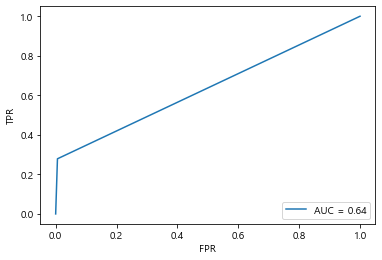

In [8]:
# 모델 생성
dt_model = DTC(random_state = 1234,
               max_depth = 4,
               min_samples_split = 20,
               min_samples_leaf = 8)
dt_model.fit(df_train_x,df_train_y)
# 정확도
train_accuracy.append(dt_model.score(df_train_x,df_train_y))
test_accuracy.append(dt_model.score(df_test_x,df_test_y))
# 예측값
y_pred = dt_model.predict(df_test_x)
# roc_curve
fpr,tpr,thresholds = roc_curve(df_test_y,y_pred)
roc_auc = auc(fpr,tpr)
# auc
model_auc.append(roc_auc)
# precision, recall, f1_score
model_precision.append(precision_score(df_test_y,y_pred))
model_recall.append(recall_score(df_test_y,y_pred))
model_f1_score.append(f1_score(df_test_y,y_pred))
# roc_curve 그래프 생성
plt.plot(fpr,tpr,label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

### Random Forest

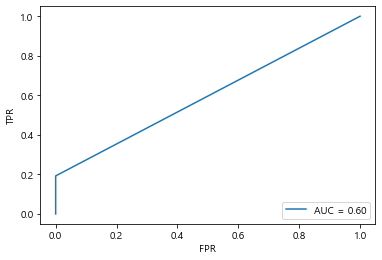

In [9]:
# 모델 생성
rf_model = RFC(random_state = 1234,
               n_estimators = 100,
               max_depth = 4,
               min_samples_leaf = 20)
rf_model.fit(df_train_x,df_train_y)
# 정확도
train_accuracy.append(rf_model.score(df_train_x,df_train_y))
test_accuracy.append(rf_model.score(df_test_x,df_test_y))
# 예측값
y_pred = rf_model.predict(df_test_x)
# roc_curve
fpr,tpr,thresholds = roc_curve(df_test_y,y_pred)
roc_auc = auc(fpr,tpr)
# auc
model_auc.append(roc_auc)
# precision, recall, f1_score
model_precision.append(precision_score(df_test_y,y_pred))
model_recall.append(recall_score(df_test_y,y_pred))
model_f1_score.append(f1_score(df_test_y,y_pred))
# roc_curve 그래프 생성
plt.plot(fpr,tpr,label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

### Gradient Boosting

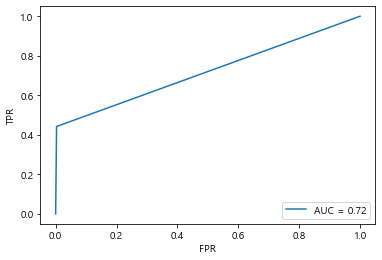

In [10]:
# 모델 생성
gb_model = GBC(random_state = 1234,
               learning_rate = 0.1,
               n_estimators = 100,
               max_depth = 4,
               min_samples_leaf = 10)
gb_model.fit(df_train_x,df_train_y)
# 정확도
train_accuracy.append(gb_model.score(df_train_x,df_train_y))
test_accuracy.append(gb_model.score(df_test_x,df_test_y))
# 예측값
y_pred = gb_model.predict(df_test_x)
# roc_curve
fpr,tpr,thresholds = roc_curve(df_test_y,y_pred)
roc_auc = auc(fpr,tpr)
# auc
model_auc.append(roc_auc)
# precision, recall, f1_score
model_precision.append(precision_score(df_test_y,y_pred))
model_recall.append(recall_score(df_test_y,y_pred))
model_f1_score.append(f1_score(df_test_y,y_pred))
# roc_curve 그래프 생성
plt.plot(fpr,tpr,label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

### Neural Network

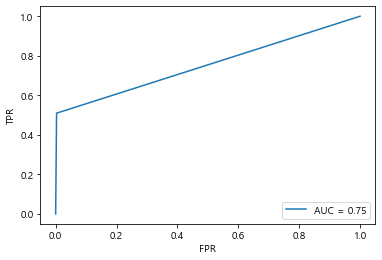

In [11]:
# 변수명 저장
v_feature_name = df_train_x.columns
# StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns = v_feature_name)
df_scaled.head()
# 데이터 분리
df_scaled_train_x, df_scaled_test_x = train_test_split(df_scaled, test_size = 0.3, random_state = 1234)
# 최종 모델
nn_model = MLPClassifier(random_state = 1234,
                         hidden_layer_sizes = (80,80),
                         activation = 'relu',
                         solver = 'adam',
                         batch_size = 100)
nn_model.fit(df_scaled_train_x, df_train_y)
# 정확도
train_accuracy.append(nn_model.score(df_scaled_train_x,df_train_y))
test_accuracy.append(nn_model.score(df_scaled_test_x,df_test_y))
# 예측값
y_pred = nn_model.predict(df_scaled_test_x)
# roc_curve
fpr,tpr,thresholds = roc_curve(df_test_y,y_pred)
roc_auc = auc(fpr,tpr)
# auc
model_auc.append(roc_auc)
# precision, recall, f1_score
model_precision.append(precision_score(df_test_y,y_pred))
model_recall.append(recall_score(df_test_y,y_pred))
model_f1_score.append(f1_score(df_test_y,y_pred))
# roc_curve 그래프 생성
plt.plot(fpr,tpr,label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

# Step 3. 시각화

In [13]:
# 모델별 평가 결과
df_eval = pd.DataFrame(index = models)
df_eval['TrainAccuracy'] = train_accuracy
df_eval['TestAccuracy'] = test_accuracy
df_eval['AUC'] = model_auc
df_eval['Precision'] = model_precision
df_eval['Recall'] = model_recall
df_eval['F1Score'] = model_f1_score
df_eval.round(4)

,TrainAccuracy,TestAccuracy,AUC,Precision,Recall,F1Score
DecisionTree,0.9363,0.9280,0.6365,0.8286,0.2788,0.4173
RandomForest,0.9268,0.9253,0.5962,1.0000,0.1923,0.3226
GradientBoosting,0.9771,0.9458,0.7197,0.9388,0.4423,0.6013
NeuralNetwork,1.0000,0.9520,0.7533,0.9464,0.5096,0.6625


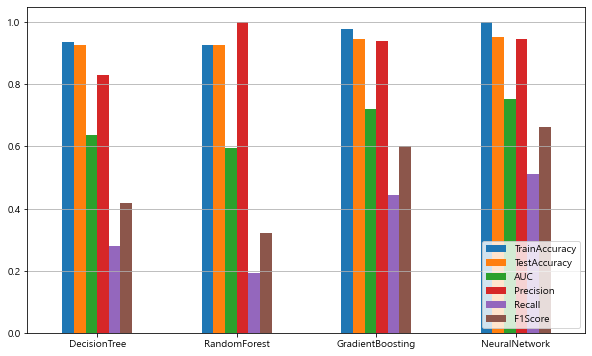

In [14]:
# 모델별 평가 지표 확인
df_eval.plot.bar(rot = 0, figsize = (10,6))
plt.legend(loc = 'lower right')
plt.grid(axis = 'y')
plt.show()

* 인공 신경망 모델의 정확도 및 F1Score가 가장 높다.
* F1Score : 인공 신경망 > 그래디언트 부스팅 > 의사결정나무 > 랜덤 포레스트